### Experiments

#### Import Libraries

In [1]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast, evaluate_on_test_data
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Import Data

In [2]:
ETTh2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh2.csv")
training_df, val_df, test_df = split_dataset(ETTh2, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [3]:
p_lag = 24
future_steps = round(12)
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]

#### ETTh2

#### RLinear

Random seed set as 42
Rlinear activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 13.404030144691466

Epoch 0: 

Train metrics: -------
Running (training) loss is 12.679381760380684.
Training MAE is 0.9609816455923089.
Training MSE is 13.224540476569342.
Training MAPE is 316426101.00467587.

Val metrics: -------
Running (validation) loss is 8.871764536414828.
Validation MAE is 0.8235394021311959.
Validation MSE is 9.520980803521125.
Validation MAPE is 0.024986451779553605.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 6.725127274084091

Epoch 1: 

Train metrics: -------
Running (training) loss is 7.003525437264267.
Training MAE is 0.7383239611846591.
Training MSE is 7.730681819325193.
Training MAPE is 296891683.2628703.

Val metrics: -------
Running (validation) loss is 6.086123336311225.
Validation MAE is 0.6956111237734228.
Validation MSE is 6.7661613286524025.
Validation MAPE is 0.02101302853591003.
-------------------

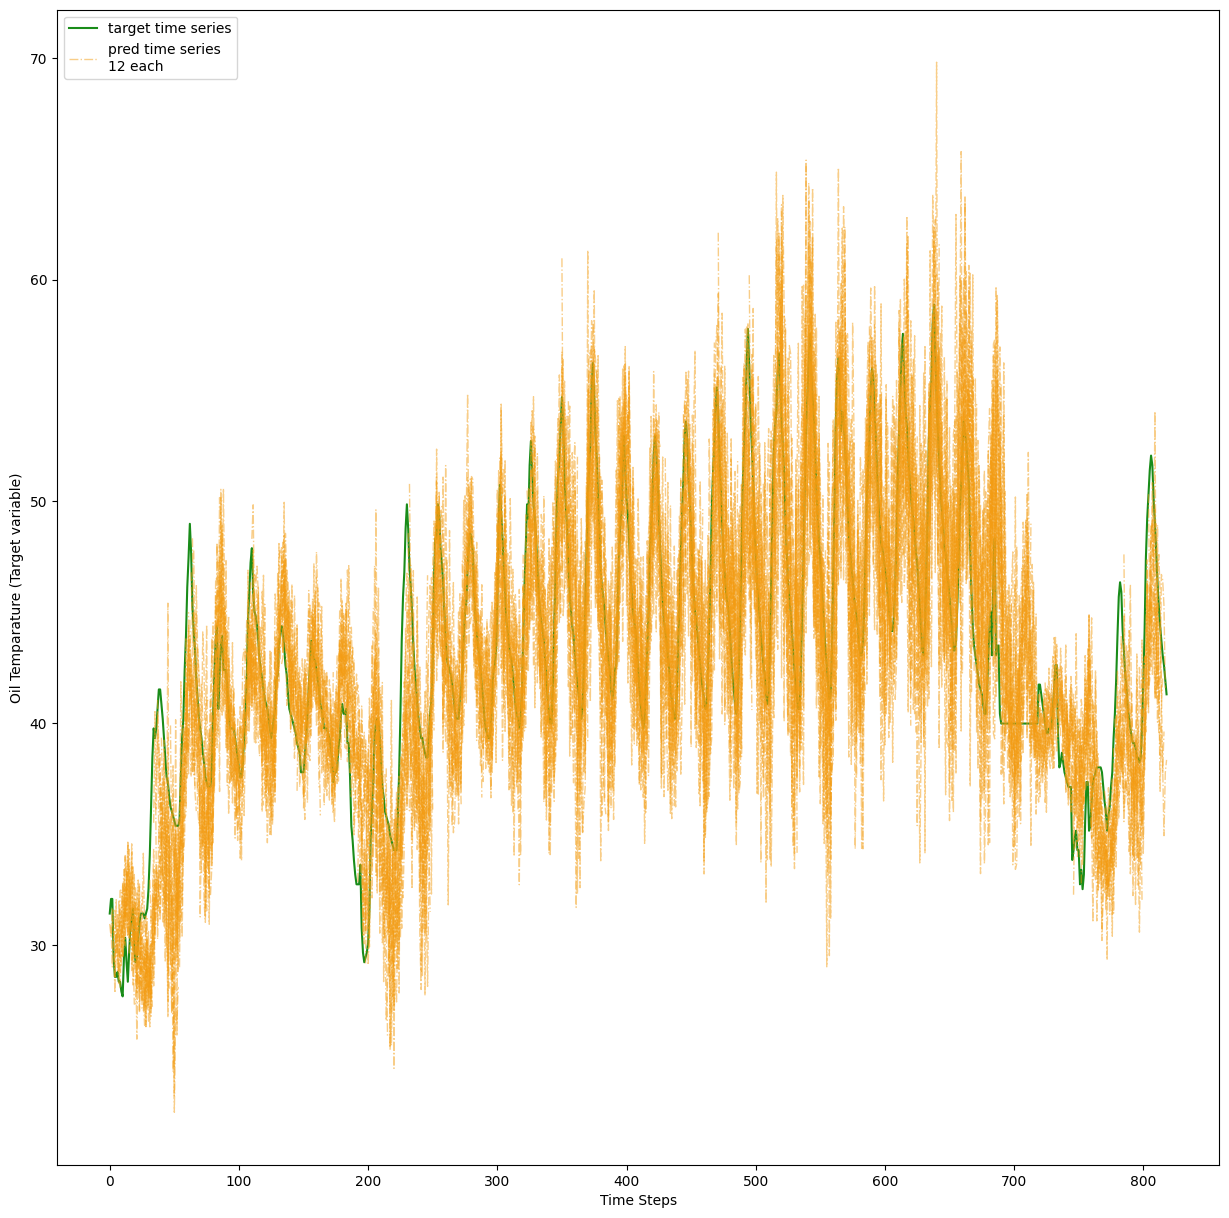

In [4]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rlinear'
            )

test_data = DataLoader(TimeSeriesDataset(test_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
#evaluate_on_test_data(test_data = test_data, neural_net = net)

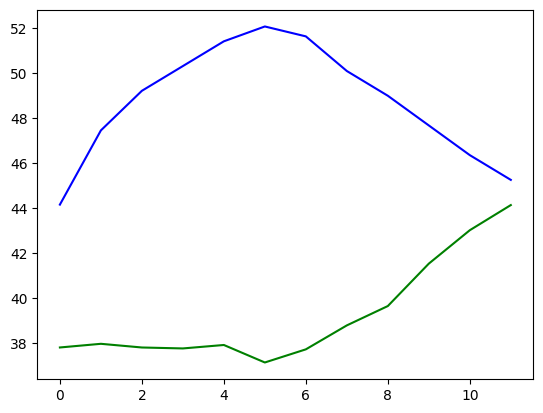

In [8]:
import matplotlib.pyplot as plt
neti = net.eval()
for i, (inputs, targets) in enumerate(test_data): 
    if i == 100: 
        break
    else: 
        output = neti(inputs)

plt.plot(output[1,:].tolist(), 'g')
plt.plot(targets[1,0,:].tolist(), 'b')

#### Dlinear

Random seed set as 42
Dlinear activated
Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 19.697492057800293

Epoch 0: 

Train metrics: -------
Running (training) loss is 16.946114638529785.
Training MAE is 1.1081135368128436.
Training MSE is 17.161452442571658.
Training MAPE is 309590500.8050145.

Val metrics: -------
Running (validation) loss is 12.618447043083526.
Validation MAE is 1.0188014312432363.
Validation MSE is 13.01652024604462.
Validation MAPE is 0.03126025628707894.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 10.376007397842407

Epoch 1: 

Train metrics: -------
Running (training) loss is 10.457334972959046.
Training MAE is 0.922106899143359.
Training MSE is 10.93161089464065.
Training MAPE is 305218377.788566.

Val metrics: -------
Running (validation) loss is 11.006651878356934.
Validation MAE is 0.9601976614404

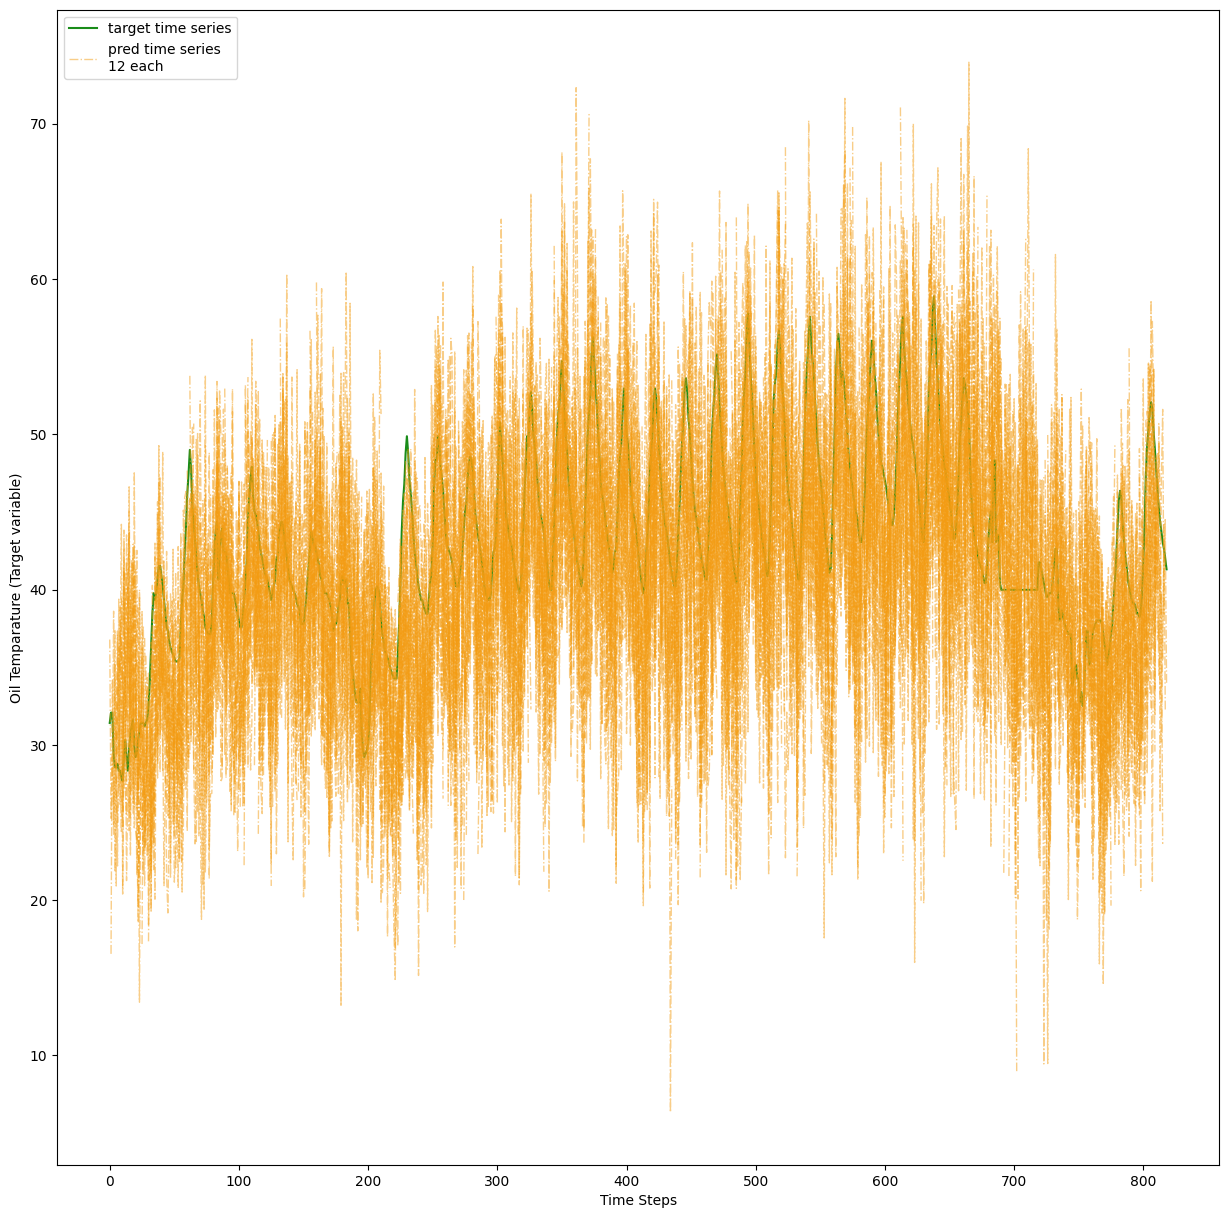

In [6]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'dlinear'
            )

test_data = DataLoader(TimeSeriesDataset(test_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### RLMP

Random seed set as 42
RMLP activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 18.471950734043123

Epoch 0: 

Train metrics: -------
Running (training) loss is 13.557115679979324.
Training MAE is 0.950750654662421.
Training MSE is 13.963879218096032.
Training MAPE is 298782953.024827.

Val metrics: -------
Running (validation) loss is 4.256864333586706.
Validation MAE is 0.5954153638455894.
Validation MSE is 4.867301504404008.
Validation MAPE is 0.01823167856987361.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 2.754371076917648

Epoch 1: 

Train metrics: -------
Running (training) loss is 3.00326876954748.
Training MAE is 0.516170061222457.
Training MSE is 3.716373322589682.
Training MAPE is 291124274.753332.

Val metrics: -------
Running (validation) loss is 2.4400285461528615.
Validation MAE is 0.47372847752502334.
Validation MSE is 3.111098375171423.
Validation MAPE is 0.014452036198965469.
------------------------

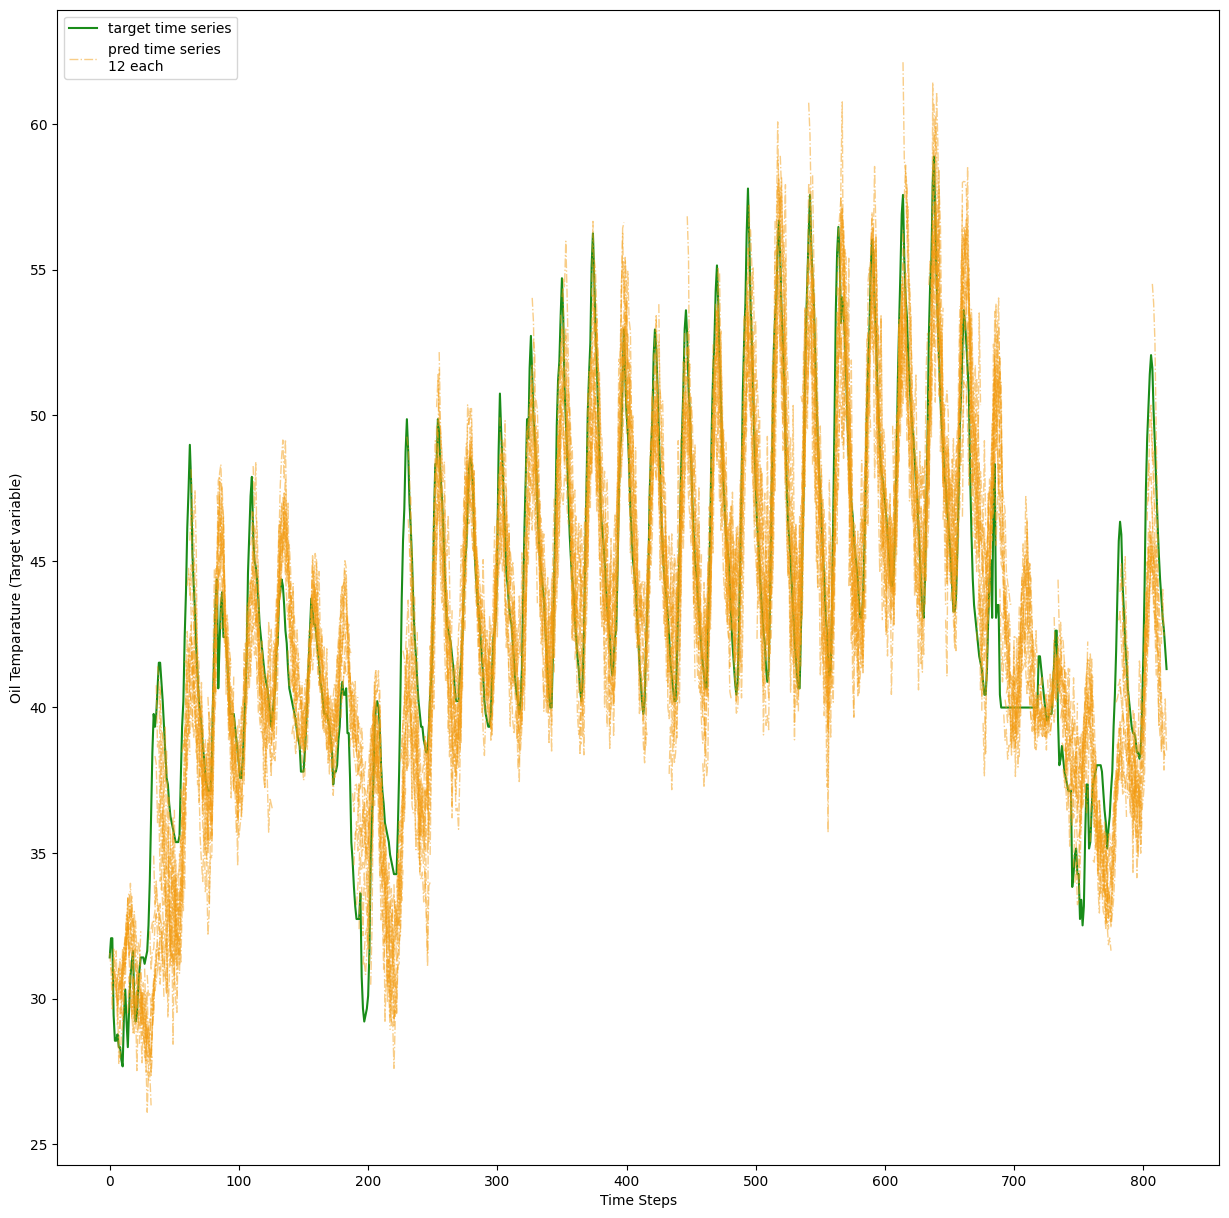

In [7]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rmlp'
            )

test_data = DataLoader(TimeSeriesDataset(test_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)